# <center> Лабораторная работа 6 _(часть 1)_

## <center> _Predict house price_

### _Автор: Стецук Максим ИВТ 3 курс_

In [1]:
# Игнорирование ошибок
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [3]:
%%capture

import wget
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

### <center> _Загрузка и подготовка данных_

In [4]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx') # загружаем таблицу в переменную training_data

In [5]:
type(training_data)

pandas.core.frame.DataFrame

In [6]:
training_data.sample(10)

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
10525,353000,2,1.00,1100,7500,1.0,0,0,3,7,1100,0,1951,0,47.7235,-122.326
9218,359950,4,2.75,2260,5705,2.0,0,0,3,8,2260,0,2014,0,47.3726,-122.159
14723,149000,3,1.00,1090,2800,1.0,0,0,3,6,1090,0,1969,0,47.3162,-122.183
2589,619850,4,2.50,2270,9247,1.0,0,0,5,8,1500,770,1972,0,47.5602,-122.176
10621,869000,2,1.75,1900,13122,1.0,1,4,3,7,1100,800,1954,0,47.5121,-122.248
6836,866800,4,3.50,2970,5000,2.0,0,2,3,9,2200,770,2001,0,47.6772,-122.399
4703,233000,3,2.00,1350,7686,1.0,0,0,3,7,1350,0,1989,0,47.3609,-122.053
5760,308000,3,1.00,1010,8800,1.0,0,0,4,7,1010,0,1954,0,47.5483,-122.278
12674,324800,2,1.00,1170,5043,1.0,0,0,3,6,880,290,1949,0,47.5492,-122.302
7031,650000,4,2.25,2330,7220,2.0,0,1,3,8,1600,730,1988,0,47.7764,-122.386


In [7]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [8]:
training_data.shape

(15129, 16)

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

In [10]:
target_variable_name = 'Целевая.Цена'

In [11]:
training_values = training_data[target_variable_name]

training_values.shape

(15129,)

In [12]:
training_points = training_data.drop(target_variable_name, axis=1)

training_data.shape

(15129, 16)

In [13]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [14]:
training_points.shape

(15129, 15)

------
## <center> Модель с использованием всех фич

### <center> _Создание и обучение моделей_

In [15]:
linear_regression_model = linear_model.LinearRegression()
print(linear_regression_model)

LinearRegression()


In [16]:
random_forest_model = ensemble.RandomForestRegressor()

print(random_forest_model)

RandomForestRegressor()


In [17]:
decision_tree_model = tree.DecisionTreeRegressor()

print(decision_tree_model)

DecisionTreeRegressor()


In [18]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [19]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [20]:
decision_tree_model.fit(training_points, training_values)

DecisionTreeRegressor()

_________________________

In [21]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

In [22]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [23]:
test_data.shape

(6484, 16)

In [24]:
test_values = test_data[target_variable_name]

In [25]:
target_variable_name

'Целевая.Цена'

In [26]:
test_points = test_data.drop(target_variable_name, axis = 1)

test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [27]:
test_points.shape

(6484, 15)

In [28]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)
test_predictions_decision_tree = decision_tree_model.predict(test_points)

print(test_predictions_linear.shape)
print(test_predictions_random_forest.shape)
print(test_predictions_decision_tree.shape)

(6484,)
(6484,)
(6484,)


### <center> _Графики_

Text(0.5, 1.0, 'LinearRegression')

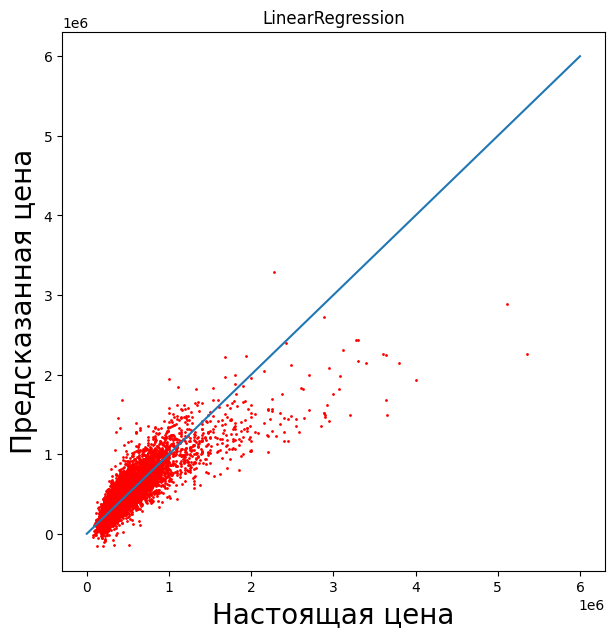

In [29]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear, s=1, c='r') # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('LinearRegression')

Text(0.5, 1.0, 'RandomForest')

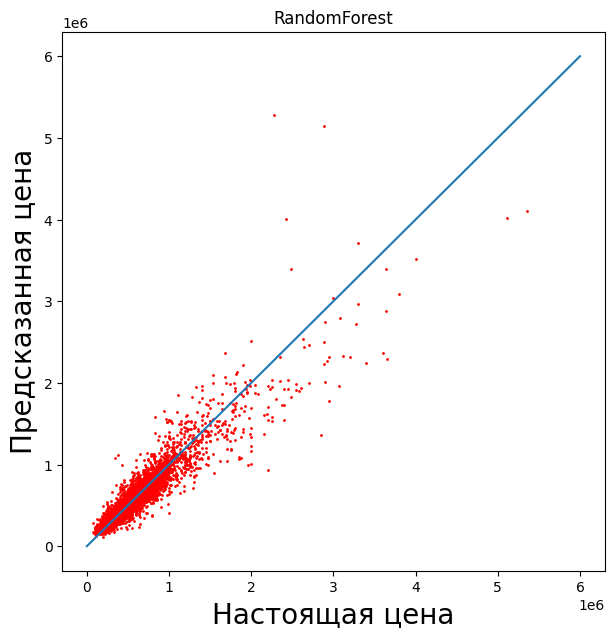

In [30]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('RandomForest')

Text(0.5, 1.0, 'DecisionTree')

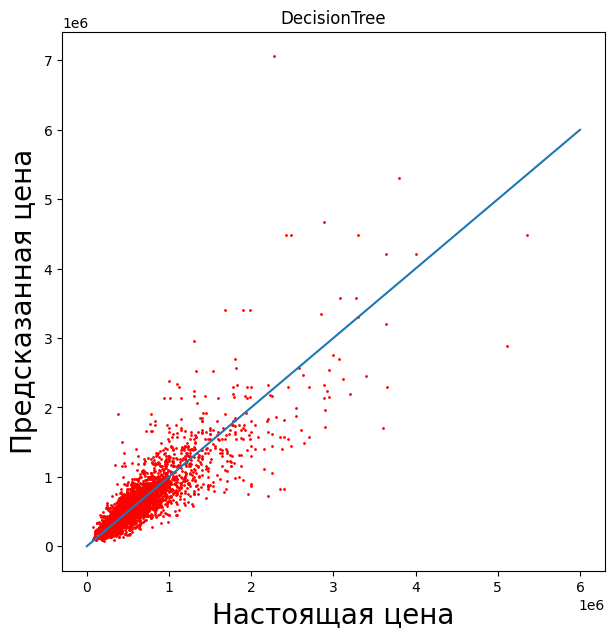

In [31]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_decision_tree, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('DecisionTree')

### <center> _Вычисление MAE и RMSE_

In [32]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

mean_absolute_error_decision_tree_model = mean_absolute_error(test_values, test_predictions_decision_tree)
mean_squared_error_decision_tree_model = mean_squared_error(test_values, test_predictions_decision_tree)

In [33]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели дерева решений".format(
       mean_absolute_error_decision_tree_model,
       mean_squared_error_decision_tree_model**(1/2)))

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
MAE: 70775.72, RMSE: 134611.73 для модели случайного леса
MAE: 100987.32, RMSE: 191997.22 для модели дерева решений


___
## <center> Исключение незначащих фич

In [34]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [35]:
random_forest_model.feature_importances_

array([0.0042089 , 0.01028452, 0.30476394, 0.02596787, 0.00257867,
       0.03046067, 0.01576086, 0.00427237, 0.28934364, 0.02695972,
       0.00741889, 0.03156704, 0.00253992, 0.17332775, 0.07054524])

In [36]:
training_points.keys()

Index(['Спальни', 'Ванные', 'Жилая площадь', 'Общая площадь',
       'Количество этажей', 'Вид на воду', 'Просмотрены ранее', 'Состояние',
       'Оценка риелтора', 'Площадь без подвала', 'Площадь подвала',
       'Год постройки', 'Год реновации', 'Широта', 'Долгота'],
      dtype='object')

In [37]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

In [38]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

feature_importance

,Название признака,Важность признака
0,Спальни,0.004209
1,Ванные,0.010285
2,Жилая площадь,0.304764
3,Общая площадь,0.025968
4,Количество этажей,0.002579
5,Вид на воду,0.030461
6,Просмотрены ранее,0.015761
7,Состояние,0.004272
8,Оценка риелтора,0.289344
9,Площадь без подвала,0.026960


In [39]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Жилая площадь,0.304764
8,Оценка риелтора,0.289344
13,Широта,0.173328
14,Долгота,0.070545
11,Год постройки,0.031567
5,Вид на воду,0.030461
9,Площадь без подвала,0.026960
3,Общая площадь,0.025968
6,Просмотрены ранее,0.015761
1,Ванные,0.010285


In [40]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [41]:
target_variable_name = 'Целевая.Цена'

training_values = training_data[target_variable_name]

training_points = training_data.drop(target_variable_name, axis=1)

columns_to_drop = ['Год реновации', 'Количество этажей']

training_points.drop(columns=columns_to_drop, inplace=True)

training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Широта,Долгота
0,5,3.50,3490,21780,0,0,3,8,3490,0,1996,47.6707,-122.144
1,4,1.75,2360,7620,0,0,4,7,1180,1180,1955,47.5278,-122.345
2,6,2.75,2040,8560,0,2,4,7,1100,940,1961,47.6160,-122.115
3,3,1.75,1940,8376,0,0,4,8,1290,650,1963,47.5586,-122.173
4,3,2.75,3450,5350,0,3,4,9,2590,860,1925,47.6389,-122.407


In [42]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [43]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [44]:
decision_tree_model.fit(training_points, training_values)

DecisionTreeRegressor()

___

In [45]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [46]:
target_variable_name

'Целевая.Цена'

In [47]:
test_values = test_data[target_variable_name]

test_points = test_data.drop(target_variable_name, axis = 1)

test_points.drop(columns=columns_to_drop, inplace=True)

test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Широта,Долгота
0,3,1.00,1300,10139,0,0,3,7,1300,0,1962,47.3427,-122.087
1,4,2.75,3280,6845,0,0,3,10,3280,0,2003,47.7042,-122.107
2,1,1.00,1220,12426,0,4,4,6,1220,0,1946,47.4047,-122.331
3,3,2.50,2880,13500,0,4,5,8,1520,1360,1950,47.6281,-122.216
4,3,2.00,1300,3731,0,0,3,7,900,400,1993,47.5374,-122.270


In [48]:
test_points.shape

(6484, 13)

In [49]:
test_predictions_linear = linear_regression_model.predict(test_points)

test_predictions_linear.shape

(6484,)

In [50]:
test_predictions_random_forest = random_forest_model.predict(test_points)

test_predictions_random_forest.shape

(6484,)

In [51]:
test_predictions_decision_tree = decision_tree_model.predict(test_points)

test_predictions_decision_tree.shape

(6484,)

### _Графики_

Text(0.5, 1.0, 'LinearRegression')

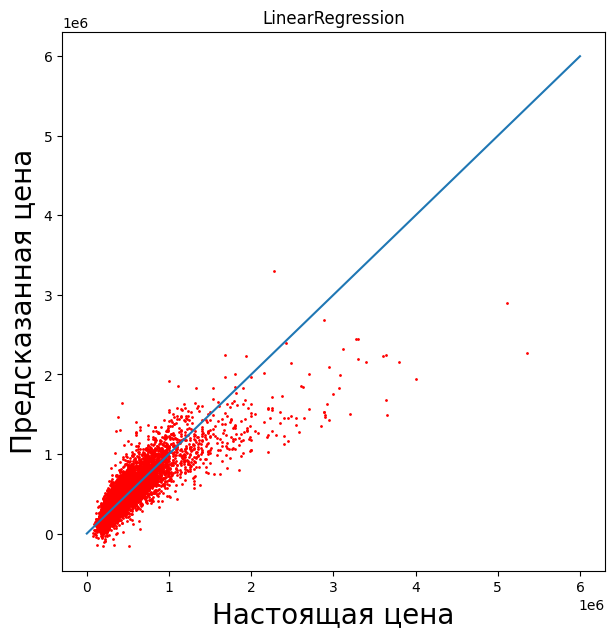

In [52]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear, s=1, c='r') # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('LinearRegression')

Text(0.5, 1.0, 'RandomForest')

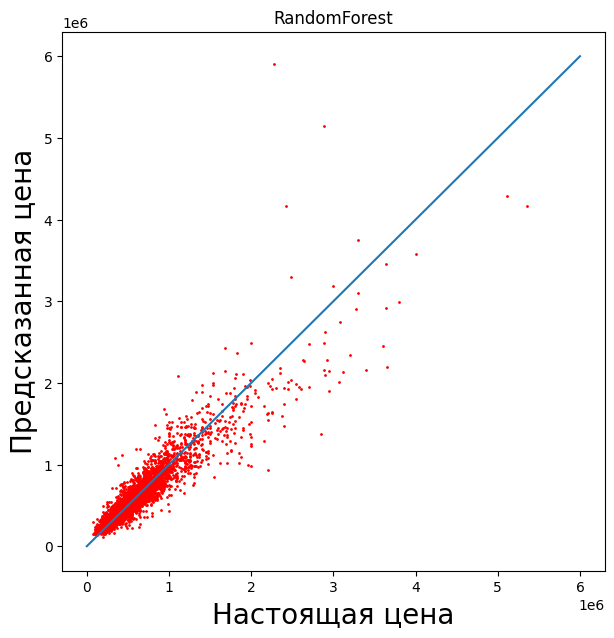

In [53]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('RandomForest')

Text(0.5, 1.0, 'DecisionTree')

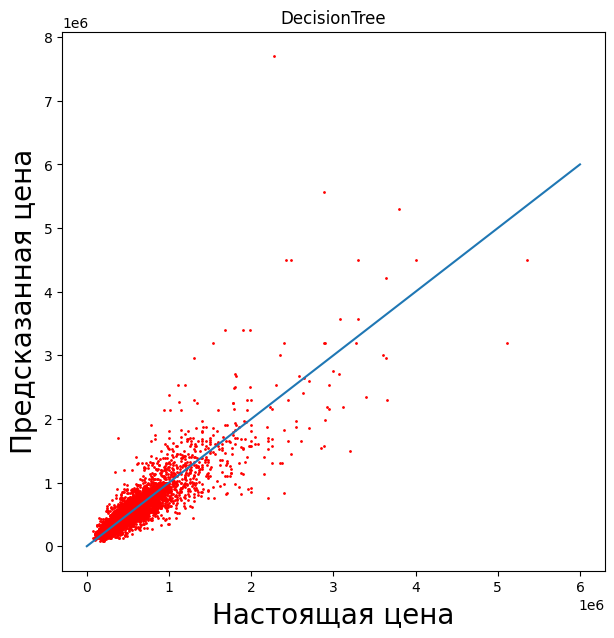

In [54]:
%matplotlib inline
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_decision_tree, s=1, c='r')
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.title('DecisionTree')

### <center> _Вычисление MAE и RMSE_

In [55]:
# Linear model
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

# Random forest model
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

# Decision tree model
mean_absolute_error_decision_tree_model = mean_absolute_error(test_values, test_predictions_decision_tree)
mean_squared_error_decision_tree_model = mean_squared_error(test_values, test_predictions_decision_tree)

In [56]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model,
       mean_squared_error_random_forest_model**(1/2)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели дерева решений".format(
       mean_absolute_error_decision_tree_model,
       mean_squared_error_decision_tree_model**(1/2)))

MAE: 126897.05, RMSE: 201788.82 для модели линейной регрессии
MAE: 71091.58, RMSE: 137351.11 для модели случайного леса
MAE: 99911.29, RMSE: 193065.47 для модели дерева решений


In [57]:
!rm predict_house_price_test_data.xlsx
!rm predict_house_price_training_data.xlsx